In [1]:
!pip install -q texthero

     |████████████████████████████████| 235 kB 10.4 MB/s 
     |████████████████████████████████| 5.0 MB 68.7 MB/s 
     |████████████████████████████████| 1.1 MB 66.3 MB/s 
     |████████████████████████████████| 211 kB 78.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
confection 0.0.3 requires srsly<3.0.0,>=2.4.0, but you have srsly 1.0.6 which is incompatible.


In [2]:
! pip install -q scikit-multilearn

     |████████████████████████████████| 89 kB 4.8 MB/s 


In [3]:
! pip install -q transformers
     

     |████████████████████████████████| 5.8 MB 6.8 MB/s 
     |████████████████████████████████| 7.6 MB 25.0 MB/s 
     |████████████████████████████████| 182 kB 52.8 MB/s 


In [4]:
!pip install -q tensorflow-text

     |████████████████████████████████| 5.8 MB 8.8 MB/s 
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 6.0 MB 58.4 MB/s 
     |████████████████████████████████| 439 kB 81.4 MB/s 
     |████████████████████████████████| 1.7 MB 68.5 MB/s 


In [5]:
!pip install -q tf-models-official

     |████████████████████████████████| 2.4 MB 7.1 MB/s 
     |████████████████████████████████| 238 kB 52.9 MB/s 
     |████████████████████████████████| 118 kB 78.6 MB/s 
     |████████████████████████████████| 352 kB 78.3 MB/s 
     |████████████████████████████████| 662 kB 72.9 MB/s 
     |████████████████████████████████| 43 kB 97 kB/s 
     |████████████████████████████████| 1.3 MB 53.0 MB/s 
     |████████████████████████████████| 1.1 MB 28.3 MB/s 
     |████████████████████████████████| 2.3 MB 35.4 MB/s 
     |████████████████████████████████| 38.2 MB 233 kB/s 


In [6]:
import zipfile
with zipfile.ZipFile("/content/sample_data/train.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

#**Data Exploration**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [8]:
sns.set_style("whitegrid")

In [9]:
df = pd.read_csv("/content/data/train.csv")

In [10]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
     

Number of rows: 159571
Number of columns: 8


In [11]:
df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [12]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

#**Length of the comments**

In [13]:
comment_lengths = [len(comment.split()) for comment in df["comment_text"]]

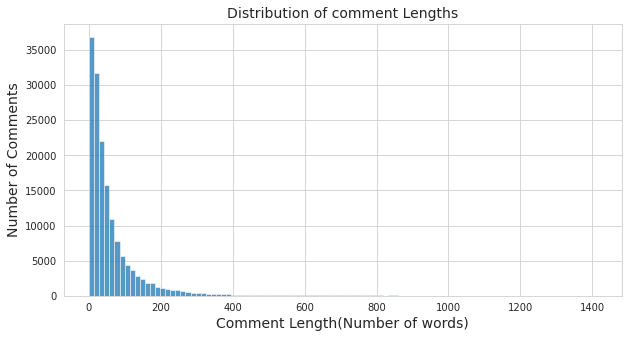

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(comment_lengths, bins=100);
plt.xlabel("Comment Length(Number of words)", fontsize=14);
plt.ylabel("Number of Comments", fontsize=14);
plt.title("Distribution of comment Lengths", fontsize=14);

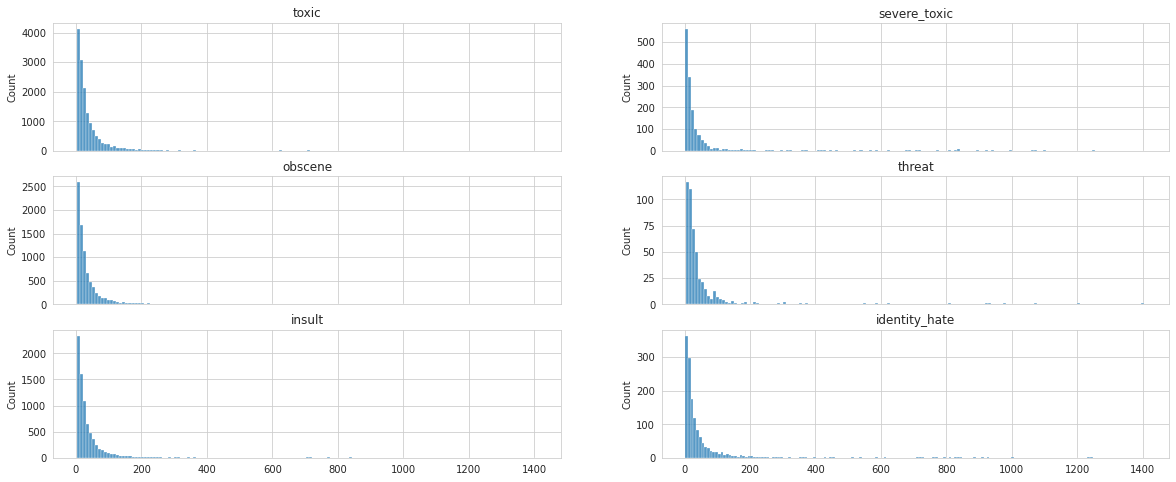

In [15]:
labels = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
fig, ax = plt.subplots(3, 2, figsize=(20,8), sharex=True)
axes =ax.ravel()
for i in range(6):
  comments = df.loc[df[labels[i]] == 1, :]
  comment_len = [len(comment.split()) for comment in comments["comment_text"]]
  sns.histplot(comment_len, ax=axes[i], bins = 150);
  axes[i].title.set_text(labels[i]);

#**Distribution of Labels**

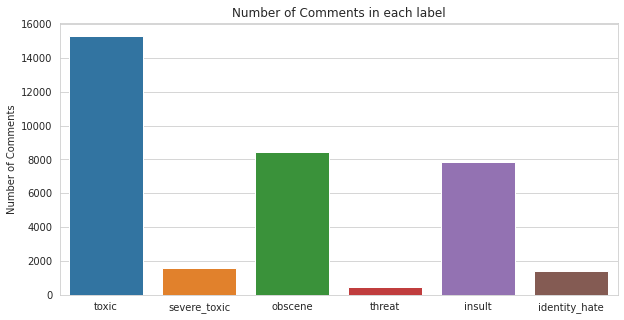

In [16]:
labels_count = df[labels].sum()
plt.figure(figsize = (10,5))
sns.barplot(x = labels_count.index,y = labels_count.values);
plt.title("Number of Comments in each label");
plt.ylabel("Number of Comments");
     

In [17]:
multilabel_count = df[labels].sum(axis = 1).value_counts()
multilabel_count

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

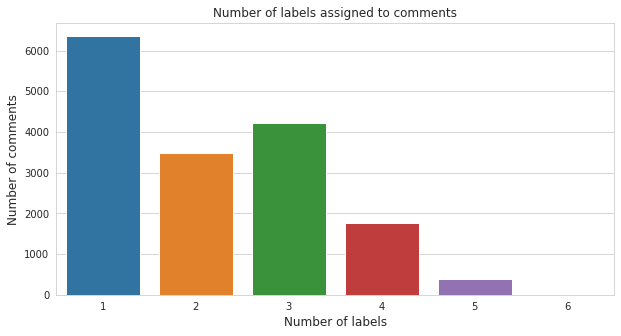

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x = multilabel_count.iloc[1:].index, y = multilabel_count.iloc[1:].values);
plt.title("Number of labels assigned to comments");
plt.xlabel("Number of labels", fontsize=12);
plt.ylabel("Number of comments",fontsize=12);

In [19]:
print(f'Number of comments with no any labels(clean tweet): {multilabel_count.iloc[0]}')
print(f'Percentage of comments with no any labels: {round(multilabel_count.iloc[0]/len(df) * 100,3)}%')
     

Number of comments with no any labels(clean tweet): 143346
Percentage of comments with no any labels: 89.832%


**Stop Words**


In [20]:
pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.6 MB 5.0 MB/s 
     |████████████████████████████████| 819 kB 54.0 MB/s 
     |████████████████████████████████| 492 kB 55.2 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.2
    Uninstalling catalogue-1.0.2:
      Successfully uninstalled catalogue-1.0.2
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.6
    Uninstalling srsly-1.0.6:
      Successfully uninstalled srsly-1.0.6
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.6
    Uninstalling thinc-7.4.6:
      Successfully uninstalled thinc-7.4.6
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.8
    Uninstalling spacy-2.3.8:
      Successfully uninstalled spacy-2.3.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [21]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import re 
import texthero as hero
from texthero import preprocessing, wordcloud
     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
wc_pipeline = [
               preprocessing.remove_urls, 
               preprocessing.remove_punctuation, 
               preprocessing.remove_digits, 
               preprocessing.remove_diacritics,
               preprocessing.lowercase, 
               preprocessing.remove_stopwords, 
               preprocessing.remove_whitespace 
               ]
 
wc_text = hero.clean(df['comment_text'], wc_pipeline)

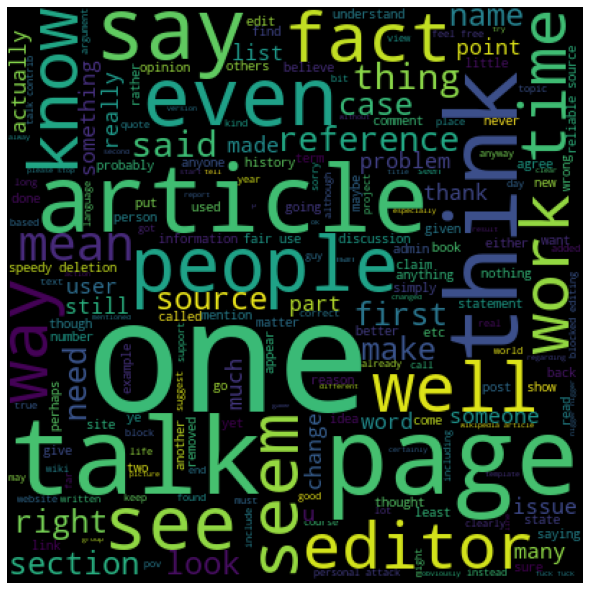

In [23]:
word_cloud = WordCloud(stopwords=set(STOPWORDS),
                       width = 400, height=400,
                       min_font_size=4).generate(" ".join(wc_text.values))
                       
plt.figure(figsize = (15, 8), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
     

##**Correlation between the target labels**

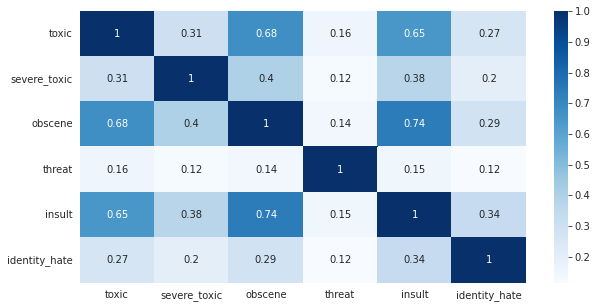

In [24]:
labels_cor = df[labels].corr()
plt.figure(figsize=(10,5))
sns.heatmap(labels_cor, annot=True, cmap='Blues');

#**Data Partition**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train, test = train_test_split(df, test_size = 0.3, random_state = 1)

In [27]:
print("Train:", train.shape)
print("Test:", test.shape)

Train: (111699, 8)
Test: (47872, 8)


#**Modeling with Bag of Words**

##**Data Processing**

In [28]:
clean_text_pipeline = [
               preprocessing.remove_urls, 
               preprocessing.remove_punctuation, 
               preprocessing.remove_digits, 
               preprocessing.remove_diacritics,
               preprocessing.lowercase,
               preprocessing.remove_stopwords,
               preprocessing.remove_whitespace , 
               preprocessing.stem 
               ]
     


In [29]:
train['clean_text'] = hero.clean(train['comment_text'], clean_text_pipeline)
test['clean_text'] = hero.clean(test['comment_text'], clean_text_pipeline)
     


In [30]:
print("Original Text:")
print(train['comment_text'].iloc[0], '\n')
print("Clean Text:")
print(train['clean_text'].iloc[0])

print("------------------------------------")

print("Original Text:")
print(train['comment_text'].iloc[1], '\n')
print("Clean Text:")
print(train['clean_text'].iloc[1])


Original Text:
"

 Happy Birthday! 

Hey,  .  Just stopping by to wish you a Happy Birthday from the Wikipedia Birthday Committee!   Have a great day!    " 

Clean Text:
happi birthday hey stop wish happi birthday wikipedia birthday committe great day
------------------------------------
Original Text:
I have no problem with the Homosexual organisations proposal, but it being a sub-category of LGBT seems contradictive. Those who optioned no on NAMBLA's inclusion under LGBT category argue that the conception of gay is restricted to adult men. Following that, all homosexual males would not be gay because obviously those underaged had not qualifyed to be gay. Thus, a sub-category would contain something that is not part of the super-category. 

Clean Text:
problem homosexu organis propos sub categori lgbt seem contradict option nambla inclus lgbt categori argu concept gay restrict adult men follow homosexu male would gay obvious underag qualifi gay thus sub categori would contain someth p

#**Vectorization - Bag Of Words**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
labels = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

x_train = train.loc[:,'clean_text']
y_train = train[labels]

x_test = test.loc[:,'clean_text']
y_test = test[labels]

In [33]:
tfidf_vec = TfidfVectorizer(ngram_range=(1,2), 
                            min_df=2, 
                            max_features=1000)
tfidf_vec.fit(x_train)
     

TfidfVectorizer(max_features=1000, min_df=2, ngram_range=(1, 2))

In [34]:
train_tfidf = tfidf_vec.transform(x_train)
test_tfidf = tfidf_vec.transform(x_test)
     

In [35]:
train_tfidf

<111699x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 2005417 stored elements in Compressed Sparse Row format>

In [36]:
print(tfidf_vec.get_feature_names())

['abl', 'absolut', 'abus', 'academ', 'accept', 'access', 'accord', 'account', 'accur', 'accus', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'addit', 'address', 'admin', 'administr', 'admit', 'advertis', 'advic', 'afd', 'age', 'ago', 'agre', 'aid', 'air', 'album', 'align', 'alleg', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'altern', 'although', 'alway', 'america', 'american', 'among', 'amount', 'anim', 'anonym', 'anoth', 'answer', 'anti', 'anyon', 'anyth', 'anyway', 'apolog', 'appar', 'appear', 'appli', 'appreci', 'appropri', 'april', 'arab', 'archiv', 'area', 'argu', 'argument', 'around', 'art', 'articl', 'articl delet', 'articl talk', 'articl would', 'ask', 'ask question', 'ass', 'ass ass', 'assert', 'asshol', 'associ', 'assum', 'attack', 'attempt', 'attent', 'august', 'author', 'automat', 'avail', 'avoid', 'awar', 'award', 'away', 'back', 'background', 'background color', 'bad', 'ball', 'ball ball', 'ban', 'band', 'bark', 'barnstar', 'base', 'basic', 'batt

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
len(tfidf_vec.get_feature_names())
     

1000

**Binary Relevance**

In [38]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, log_loss, hamming_loss, accuracy_score
     

In [39]:
def eval_fun_br(x_test, y_test, classifier):
    
    y_labels = classifier.predict(x_test).todense()
   
    y_pred = classifier.predict_proba(x_test).todense()

    
    accuracy = np.mean([accuracy_score(y_test.iloc[:,i], y_labels[:,i]) for i in range (6)])

   
    auc = np.mean([roc_auc_score(y_test.iloc[:,i], y_pred[:,i]) for i in range (6)])

    
    logloss = np.mean([log_loss(y_test.iloc[:,i], y_pred[:,i]) for i in range(6)])

    return pd.DataFrame({'Model':'BR-' + type(classifier.classifier).__name__,
                        "Accuracy": np.round(accuracy,3),
                        
                        "AUC": np.round(auc,3) ,
                        "Log loss": np.round(logloss,3)}, index = [0])

**Logistic Regression**

In [40]:
# Logistic Regression
lr_clf = BinaryRelevance(LogisticRegression( solver='liblinear'))
lr_clf.fit(train_tfidf, y_train)
     

BinaryRelevance(classifier=LogisticRegression(solver='liblinear'),
                require_dense=[True, True])

In [41]:
# evaluation
lr_eval = eval_fun_br(x_test=test_tfidf, y_test=y_test, classifier=lr_clf)
lr_eval
     


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn

,Model,Accuracy,AUC,Log loss
0,BR-LogisticRegression,0.979,0.96,0.064


**Naive Bayes**

In [42]:
nb_clf = BinaryRelevance(MultinomialNB())
nb_clf.fit(train_tfidf, y_train)
     

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [43]:
nb_eval = eval_fun_br(x_test=test_tfidf, y_test=y_test, classifier=nb_clf)
nb_eval
     

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn

,Model,Accuracy,AUC,Log loss
0,BR-MultinomialNB,0.976,0.955,0.071


In [44]:
BR_results = lr_eval.append(nb_eval).reset_index(drop = True)
BR_results

,Model,Accuracy,AUC,Log loss
0,BR-LogisticRegression,0.979,0.960,0.064
1,BR-MultinomialNB,0.976,0.955,0.071


#**Classifier Chain**



In [45]:
from sklearn.multioutput import ClassifierChain

In [46]:
def eval_fun_chain(x_test, y_test, classifier):
   
    y_labels = classifier.predict(x_test)
    
    y_pred = classifier.predict_proba(x_test)

   
    accuracy = np.mean([accuracy_score(y_test.iloc[:,i], y_labels[:,i]) for i in range (6)])

    auc = np.mean([roc_auc_score(y_test.iloc[:,i], y_pred[:,i]) for i in range (6)])


    logloss = np.mean([log_loss(y_test.iloc[:,i], y_pred[:,i]) for i in range(6)])

    return pd.DataFrame({'Model':'Chain-' + type(classifier.base_estimator).__name__,
                        "Accuracy": np.round(accuracy,3),
                        "AUC": np.round(auc,3) ,
                        "Log loss": np.round(logloss,3)}, index = [0])

**Logistic Regression**

In [47]:
lr_chain = ClassifierChain(LogisticRegression(solver='liblinear'))
lr_chain.fit(train_tfidf, y_train)

ClassifierChain(base_estimator=LogisticRegression(solver='liblinear'))

In [48]:
lr_chain_eval = eval_fun_chain(test_tfidf, y_test, lr_chain)
lr_chain_eval

,Model,Accuracy,AUC,Log loss
0,Chain-LogisticRegression,0.979,0.95,0.069


**Naive Bayes**

In [49]:
nb_chain = ClassifierChain(MultinomialNB())
nb_chain.fit(train_tfidf, y_train)
     

ClassifierChain(base_estimator=MultinomialNB())

In [50]:
nb_chain_eval = eval_fun_chain(test_tfidf, y_test, nb_chain)
nb_chain_eval

,Model,Accuracy,AUC,Log loss
0,Chain-MultinomialNB,0.968,0.946,0.124


In [51]:
chain_results = lr_chain_eval.append(nb_chain_eval).reset_index(drop = True)
chain_results

,Model,Accuracy,AUC,Log loss
0,Chain-LogisticRegression,0.979,0.950,0.069
1,Chain-MultinomialNB,0.968,0.946,0.124


In [52]:
br_chain_results = BR_results.append(chain_results).reset_index(drop = True)
br_chain_results

,Model,Accuracy,AUC,Log loss
0,BR-LogisticRegression,0.979,0.960,0.064
1,BR-MultinomialNB,0.976,0.955,0.071
2,Chain-LogisticRegression,0.979,0.950,0.069
3,Chain-MultinomialNB,0.968,0.946,0.124


**Hyperparameter Tuning**

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameters = [{'classifier':[LogisticRegression(solver='liblinear')],
               'classifier__C':[0.0001, 0.05, 1, 10,100,1000]}]
lr_search = GridSearchCV(BinaryRelevance(), param_grid=parameters, scoring='accuracy', cv = 4)
lr_search.fit(train_tfidf, y_train)

GridSearchCV(cv=4, estimator=BinaryRelevance(require_dense=[True, True]),
             param_grid=[{'classifier': [LogisticRegression(C=1,
                                                            solver='liblinear')],
                          'classifier__C': [0.0001, 0.05, 1, 10, 100, 1000]}],
             scoring='accuracy')

In [55]:
lr_search.best_params_
     

{'classifier': LogisticRegression(C=1, solver='liblinear'), 'classifier__C': 1}

**Word Embeddings/ Sentence Embeddings**

In [56]:
!pip install -q gensim

In [57]:
import gensim
import gensim.downloader as api

In [58]:
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [59]:
word_vectors = model.wv

<ipython-input-59-aa19759b2b96>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  word_vectors = model.wv


In [60]:
type(word_vectors)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [61]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, tokens, generate_missing=False):
    embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, 
                                                            generate_missing=generate_missing))
    return list(embeddings)
     

In [62]:
clean_we_pipeline = [
               preprocessing.remove_urls, 
               preprocessing.remove_punctuation,
               preprocessing.remove_digits,
               preprocessing.remove_diacritics,
               preprocessing.lowercase, 
               preprocessing.remove_stopwords,
               preprocessing.remove_whitespace 
               ]
     

In [63]:
train_we_text = hero.clean(train['comment_text'], clean_we_pipeline)
test_we_text = hero.clean(test['comment_text'], clean_we_pipeline)
     

In [64]:
train_we_tokens = train_we_text.apply(lambda x: x.split())
test_we_tokens = test_we_text.apply(lambda x: x.split())

In [65]:
train_embeddings = get_word2vec_embeddings(vectors=word_vectors, tokens=train_we_tokens)
test_embeddings = get_word2vec_embeddings(vectors=word_vectors, tokens=test_we_tokens)
     

In [66]:
print(type(train_embeddings))
print(len(train_embeddings))

<class 'list'>
111699


In [67]:
train_embeddings_matrix = np.array(train_embeddings)
test_embeddings_matrix = np.array(test_embeddings)

print(train_embeddings_matrix.shape,  test_embeddings_matrix.shape)
     

(111699, 300) (47872, 300)


In [68]:
labels_present = (y_train.sum(axis = 1) > 1).astype('int')

In [69]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
from sklearn.decomposition import TruncatedSVD

In [71]:
pca_component = TruncatedSVD(n_components=2).fit_transform(train_embeddings_matrix)

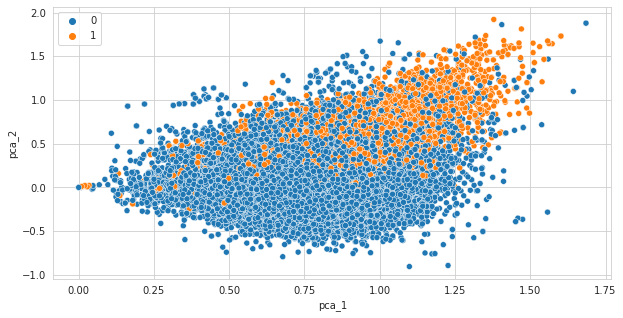

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = pca_component[:,0], y = pca_component[:,1], hue=labels_present);
plt.xlabel('pca_1');
plt.ylabel('pca_2');
     


**Binary Relevance -Logistic Regression with word embeddings**

In [73]:
lr_we = BinaryRelevance(LogisticRegression(solver = 'liblinear'))
lr_we.fit(train_embeddings_matrix, y_train)

BinaryRelevance(classifier=LogisticRegression(solver='liblinear'),
                require_dense=[True, True])

In [74]:
lr_we_results = eval_fun_br(x_test=test_embeddings_matrix, y_test=y_test, classifier=lr_we)
lr_we_results
     

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn

,Model,Accuracy,AUC,Log loss
0,BR-LogisticRegression,0.975,0.965,0.071


#**DEEP LEARNING**

**LSTM**

In [75]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Bidirectional, Embedding, LSTM, BatchNormalization, Dropout
     

In [76]:
clean_text_dl_pipeline = [
               preprocessing.remove_urls, 
               preprocessing.remove_diacritics,
               preprocessing.remove_punctuation,
               preprocessing.remove_digits,
               preprocessing.remove_whitespace 
               ]
train_dl = hero.clean(train['comment_text'], clean_text_dl_pipeline)
test_dl = hero.clean(test['comment_text'], clean_text_dl_pipeline)
     

In [77]:
VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='')

tokenizer.fit_on_texts(train_dl.values)
     

In [78]:
word_index = tokenizer.word_index
print(f'Number of unique words found: {len(word_index)}')

Number of unique words found: 139167


In [79]:
train_tokens = tokenizer.texts_to_sequences(train_dl.values)
test_tokens = tokenizer.texts_to_sequences(test_dl.values)

In [80]:
for seq in train_tokens[:5]:
  print(seq)

[446, 3820, 384, 55, 4721, 35, 3, 519, 7, 8, 446, 3820, 34, 2, 31, 3820, 1534, 20, 8, 279, 291]
[4, 20, 50, 238, 24, 2, 3169, 4980, 1371, 29, 11, 92, 8, 1930, 452, 6, 4722, 207, 1, 149, 66, 1, 50, 16, 1, 19, 913, 177, 4722, 452, 1241, 10, 2, 8508, 6, 759, 9, 4788, 3, 3250, 960, 406, 10, 45, 3169, 5324, 51, 15, 17, 759, 72, 566, 149, 1, 102, 15, 1, 3, 17, 759, 720, 8, 1930, 452, 51, 1657, 172, 10, 9, 15, 228, 6, 2, 2238, 452]
[4, 196, 362, 133, 14, 899, 362, 26, 4, 55, 362, 532, 11, 5, 10, 27, 8, 362, 249, 86, 586, 362, 5825, 9037, 39, 225]
[6167, 2, 1, 6167, 2, 1, 1, 1, 1, 1, 1, 6167, 2, 1, 9, 8, 790, 560, 887, 5, 2, 422, 1, 6, 2, 6167, 790, 560, 760, 1226, 35, 9531, 18, 103, 18, 12, 1384, 3662, 225, 3187, 8144, 5, 8, 2113, 609, 2, 118, 560, 27, 1226, 16, 885, 3, 454, 9531, 24, 8, 1, 3, 9532, 5536, 19, 9920, 887, 4340, 67, 12, 790, 4396, 148, 85, 6167, 46, 634, 52, 6, 2, 242, 19, 210, 428, 790, 560, 1155, 24, 69, 760, 346, 2694, 61, 96, 975, 3649, 12, 134, 1752, 38, 9531, 102, 8, 726, 

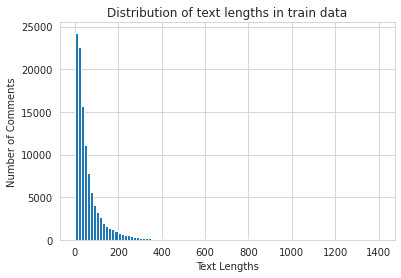

In [81]:
text_lengths = [len(seq) for seq in train_tokens]
plt.hist(text_lengths, bins=100);
plt.title("Distribution of text lengths in train data");
plt.xlabel('Text Lengths');
plt.ylabel("Number of Comments");
     

In [82]:
print(f'Mean length of text sequences: {np.mean(text_lengths)}')

Mean length of text sequences: 67.6711071719532


In [83]:
PAD_LENGTH = 200
train_padded = pad_sequences(train_tokens, maxlen = PAD_LENGTH,padding='post',truncating='post')
test_padded = pad_sequences(test_tokens, maxlen = PAD_LENGTH,padding='post',truncating='post')

In [84]:
model = Sequential()
model.add(Input(shape=(None,)))

model.add(Embedding(input_dim=VOCAB_SIZE+1, output_dim=300, 
                    input_length=PAD_LENGTH, mask_zero=True))


model.add(LSTM(units= 50, dropout=0.4, return_sequences=False))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(6, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         3000300   
                                                                 
 lstm (LSTM)                 (None, 50)                70200     
                                                                 
 dense (Dense)               (None, 512)               26112     
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                        

In [85]:
# compile the model
model.compile(tf.keras.optimizers.Adam(lr = 5e-4),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(),tf.metrics.AUC(multi_label=True, name='auc')])

In [86]:
callbacks = [tf.keras.callbacks.ModelCheckpoint('best_lstm_model', save_best_only=True),
             tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2),
              tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)]
     

In [87]:
# fit the model
lstm_history = model.fit(train_padded, y_train,
                         validation_data = (test_padded, y_test),
                         batch_size=32,
                         epochs = 6, callbacks = callbacks)

Epoch 1/6


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3489/3491 [============================>.] - ETA: 0s - loss: 0.0771 - binary_accuracy: 0.9752 - auc: 0.9092

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3491/3491 [==============================] - 170s 45ms/step - loss: 0.0770 - binary_accuracy: 0.9752 - auc: 0.9092 - val_loss: 0.0560 - val_binary_accuracy: 0.9807 - val_auc: 0.9530 - lr: 0.0010
Epoch 2/6
3490/3491 [============================>.] - ETA: 0s - loss: 0.0526 - binary_accuracy: 0.9811 - auc: 0.9593

3491/3491 [==============================] - 86s 25ms/step - loss: 0.0526 - binary_accuracy: 0.9811 - auc: 0.9593 - val_loss: 0.0521 - val_binary_accuracy: 0.9816 - val_auc: 0.9604 - lr: 0.0010
Epoch 3/6
3491/3491 [==============================] - 69s 20ms/step - loss: 0.0461 - binary_accuracy: 0.9831 - auc: 0.9704 - val_loss: 0.0522 - val_binary_accuracy: 0.9816 - val_auc: 0.9612 - lr: 0.0010
Epoch 4/6
3491/3491 [==============================] - 65s 19ms/step - loss: 0.0400 - binary_accuracy: 0.9849 - auc: 0.9799 - val_loss: 0.0541 - val_binary_accuracy: 0.9800 - val_auc: 0.9618 - lr: 0.0010
Epoch 5/6
3491/3491 [==============================] - 77s 22ms/step - loss: 0.0304 - binary_accuracy: 0.9883 - auc: 0.9887 - val_loss: 0.0550 - val_binary_accuracy: 0.9815 - val_auc: 0.9440 - lr: 2.0000e-04
Epoch 6/6
3491/3491 [==============================] - 65s 19ms/step - loss: 0.0275 - binary_accuracy: 0.9895 - auc: 0.9909 - val_loss: 0.0584 - val_binary_accuracy: 0.9818 - val_auc: 0.9382

In [88]:
lstm_history.history['loss']

[0.07703913748264313,
 0.0526275560259819,
 0.046111419796943665,
 0.04002752527594566,
 0.03036174178123474,
 0.027514027431607246]

In [89]:
lstm_history.history['val_loss']

[0.056024063378572464,
 0.05208265781402588,
 0.05220430716872215,
 0.05408041924238205,
 0.054956261068582535,
 0.058366794139146805]

In [90]:
lstm_history.history['auc']

[0.9092149138450623,
 0.9593227505683899,
 0.9703556895256042,
 0.9798787236213684,
 0.9887332916259766,
 0.9909162521362305]

In [92]:
lstm_history.history['val_auc']

[0.9529657959938049,
 0.9604341387748718,
 0.9612199664115906,
 0.9618239402770996,
 0.9440000653266907,
 0.938228189945221]

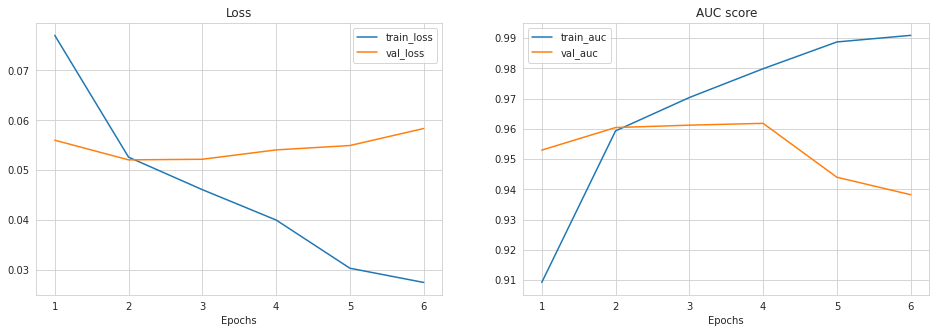

In [93]:
fig, ax = plt.subplots(1,2, figsize = (16,5))
epochs = [i for i in range(1,7)]
ax[0].plot(epochs, lstm_history.history['loss'], label = 'train_loss');
ax[0].plot(epochs, lstm_history.history['val_loss'], label = 'val_loss');
ax[0].set_title("Loss");
ax[0].set_xlabel("Epochs")
ax[0].legend();

ax[1].plot(epochs, lstm_history.history['auc'], label = 'train_auc');
ax[1].plot(epochs, lstm_history.history['val_auc'], label = 'val_auc');
ax[1].set_title("AUC score");
ax[1].set_xlabel("Epochs")
ax[1].legend();
     

In [94]:
best_model = tf.keras.models.load_model('best_lstm_model')
     

In [95]:
loss, accuracy, auc = best_model.evaluate(test_padded, y_test)

print(f'Accuracy : {np.round(accuracy,4)}')
print(f'Auc : {np.round(auc,4)}')
print(f'Logloss : {np.round(loss,4)}')

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1496/1496 [==============================] - 11s 6ms/step - loss: 0.0521 - binary_accuracy: 0.9816 - auc: 0.9604
Accuracy : 0.9816
Auc : 0.9604
Logloss : 0.0521


**Transfer Learning with Bert**

In [96]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization 
     

In [97]:
clean_text_bert_pipeline = [
               preprocessing.remove_urls, 
               preprocessing.remove_diacritics,
               preprocessing.remove_whitespace 
               ]
train_bert = hero.clean(train['comment_text'], clean_text_bert_pipeline)
test_bert = hero.clean(test['comment_text'], clean_text_bert_pipeline)

In [98]:
labels = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y_train = train[labels]
y_test = test[labels]
     

In [99]:
batch_size = 32
seed = 42

train_ds = tf.data.Dataset.from_tensor_slices((train_bert.values, y_train.values)).shuffle(50000).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((test_bert.values, y_test.values)).shuffle(50000).batch(batch_size)
     

In [100]:
for train_batch in train_ds.take(1):
  print(train_batch[:2])

(<tf.Tensor: shape=(32,), dtype=string, numpy=
array([b'PS: I almost forgot. Having Bowern here on board as an interested party does not lend credibility to unbiasedness,',
       b'" dego Please do not replace Wikipedia pages with blank content. Blank pages are harmful to Wikipedia because they have a tendency to confuse readers. If it is a duplicate article, please redirect it to an appropriate existing page. If the page has been vandalised, please revert it to the last legitimate version. If you feel that the content of a page is inappropriate, please edit the page and replace it with appropriate content. If you believe there is no hope for the page, please see the deletion policy for how to proceed. Thanks for contributing to Wikipedia! April 28th Your recent edit to Progressivism was reverted by an automated bot that attempts to recognize and repair vandalism to Wikipedia articles. If the bot reverted a legitimate edit, please accept our apologies - if you bring it to the attentio

**Loading the models form tensorflow hub**

In [101]:
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [102]:

tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(500, activation='relu')(net)
  net = tf.keras.layers.Dense(6, activation= "sigmoid" , name='classifier')(net)
  return tf.keras.Model(text_input, net)
     

In [103]:
classifier_model = build_classifier_model()
classifier_model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [104]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = [tf.metrics.BinaryAccuracy(), tf.metrics.AUC(multi_label=True)]

In [105]:
epochs = 20
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [106]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [107]:
callbacks = [tf.keras.callbacks.ModelCheckpoint('best_bert_model', save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
     

In [109]:
bert_history = classifier_model.fit(train_ds, 
                               validation_data=test_ds, 
                               epochs = 6, 
                               callbacks = callbacks)

Epoch 1/6
3491/3491 [==============================] - ETA: 0s - loss: 0.0598 - binary_accuracy: 0.9796 - auc: 0.9482

3491/3491 [==============================] - 641s 184ms/step - loss: 0.0598 - binary_accuracy: 0.9796 - auc: 0.9482 - val_loss: 0.0473 - val_binary_accuracy: 0.9817 - val_auc: 0.9754
Epoch 2/6
3491/3491 [==============================] - ETA: 0s - loss: 0.0432 - binary_accuracy: 0.9836 - auc: 0.9757

3491/3491 [==============================] - 640s 183ms/step - loss: 0.0432 - binary_accuracy: 0.9836 - auc: 0.9757 - val_loss: 0.0429 - val_binary_accuracy: 0.9831 - val_auc: 0.9813
Epoch 3/6
3491/3491 [==============================] - ETA: 0s - loss: 0.0370 - binary_accuracy: 0.9854 - auc: 0.9832

3491/3491 [==============================] - 643s 184ms/step - loss: 0.0370 - binary_accuracy: 0.9854 - auc: 0.9832 - val_loss: 0.0412 - val_binary_accuracy: 0.9837 - val_auc: 0.9738
Epoch 4/6
3491/3491 [==============================] - 640s 183ms/step - loss: 0.0319 - binary_accuracy: 0.9871 - auc: 0.9872 - val_loss: 0.0432 - val_binary_accuracy: 0.9831 - val_auc: 0.9754
Epoch 5/6
3491/3491 [==============================] - 635s 182ms/step - loss: 0.0275 - binary_accuracy: 0.9888 - auc: 0.9915 - val_loss: 0.0475 - val_binary_accuracy: 0.9831 - val_auc: 0.9650
Epoch 6/6
3491/3491 [==============================] - 649s 186ms/step - loss: 0.0237 - binary_accuracy: 0.9904 - auc: 0.9926 - val_loss: 0.0535 - val_binary_accuracy: 0.9831 - val_auc: 0.9584


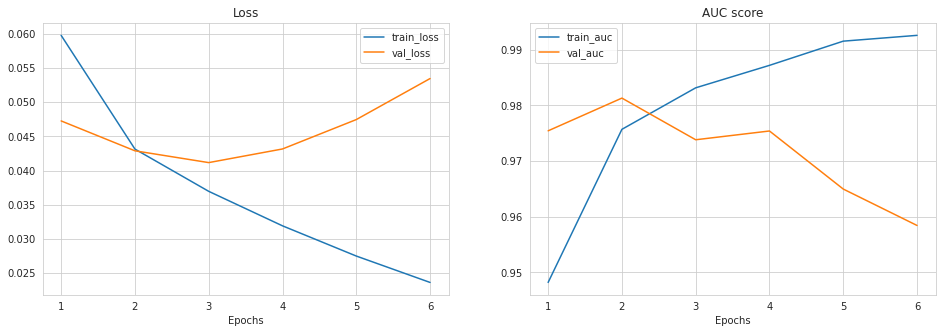

In [110]:
fig, ax = plt.subplots(1,2, figsize = (16,5))
epochs = [i for i in range(1,7)]
ax[0].plot(epochs, bert_history.history['loss'], label = 'train_loss');
ax[0].plot(epochs, bert_history.history['val_loss'], label = 'val_loss');
ax[0].set_title("Loss");
ax[0].set_xlabel("Epochs")
ax[0].legend();

ax[1].plot(epochs, bert_history.history['auc'], label = 'train_auc');
ax[1].plot(epochs, bert_history.history['val_auc'], label = 'val_auc');
ax[1].set_title("AUC score");
ax[1].set_xlabel("Epochs")
ax[1].legend();

In [111]:
bert_model = tf.keras.models.load_model('best_bert_model', compile = False)

In [112]:
bert_model.compile(optimizer=optimizer, loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=metrics)

In [113]:
loss, accuracy,auc = bert_model.evaluate(test_ds)

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1496/1496 [==============================] - 142s 94ms/step - loss: 0.0412 - binary_accuracy: 0.9834 - auc: 0.9656


In [114]:
print(f"Accuracy: {np.round(accuracy,4)}")
print(f"AUC: {np.round(auc,4)}")
print(f"Logloss: {np.round(loss,4)}")
     

Accuracy: 0.9834
AUC: 0.9656
Logloss: 0.0412
